# MVP Análise de Dados e Boas Práticas

**Nome:** Amanda Monteiro do Amaral

**Matrícula:** 4052025000136

**Dataset:** [Covid-19 Static Data Structure](https://github.com/CSSEGISandData/COVID-19_Unified-Dataset/blob/master/COVID-19_Static.csv.xz)

  Informações sobre Dataset: https://github.com/CSSEGISandData/COVID-19_Unified-Dataset/blob/master/COVID-19_Static.md


# Descrição do Problema

O conjunto de dados unificados referente ao Covid-19 é um conjunto de dados multivariado que consiste em uma identificação espacial única e diversos atributos relacionados a essa posição, tais quais: concentração de gases na atmosfera, métricas para facilidade de acesso a unidades de saúde, doenças pré-existentes, densidade e proporção populacional e outros.

O objetivo principal é realizar uma regressão para descobrir quais variáveis como composição da atmosfera, doenças já identificadas, impacto do gênero e outras que impactam o risco populacional de hospitaliçação ou gravidade da Covid-19 (Risk_High).

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Qual doença pré-existente apresenta maior fator de risco estimado para hospitalização por COVID-19, independente das outras variáveis ou doença?

- A qualidade do ambiente e do clima urbano, medida por poluentes atmosféricos, interfere na incidência de doença crônica pulmonar?

- O acesso a serviços de saúde sozinho impacta o risco estimado para hospitalização em caso de COVID-19? Ex: Menos cuidados de profilaxia implicam em maior risco da doença se agravar.

## Tipo de Problema

Este é um problema de regressão supervisionada. Dado um conjunto de características relacionadas a clima (como temperatura e umidade média), infraestrutura de saúde, fatores socioeconômicos e dados populacionais, o objetivo é prever a proporção da população com risco elevado para COVID-19 grave (hospitalização).

O projeto busca responder perguntas, que muitas vezes ficaram sem resposta, sobre as correlações dessas variáveis com a doença.
Até hoje a Covid-19 ainda tem muitas lacunas à serem preenchidas e muitas hipóteses para serem estudadas. Essa análise ajudará a entender melhor os impactos dos fatores sobre o agravamento da doença, nos dando a oportunidade como sociedade de atuarmos com o conhecimento necessário para prevenção ou melhor contenção em caso de novos surtos.

## Seleção de Dados

A Captação de dados será feita através da descompressão de um arquivo pertencente a **Johns Hopkins Whiting School of Engineering** disponível em um repositório da Git. Esse repositório contém dados sobre Covid-19 extraídos de diversas fontes oficiais ao redor do mundo, sua parte ocidental, e o agrupados em um só Dataset.

## Atributos do Dataset

O dataset Covid-19_Static contém 16394 linhas e possui 34 atributos.

Apenas o atributo *ID* não é numérico, pois ele representa a sigla de uma região.

As informações sobre o Dataset no geral estão abaixo do link para o DataSet logo na primeira parte. Como não utilizaremos todos os atributos, vou dividir os que serão utilizados:

- **Variável de Risco (Alvo):**
Risk_High


- ***Doenças e Comportamentos Pré-Existentes***

COPD (Doença Crônica Pulmonar), CVD (Doença Cardiovascular), Diabetes, Hypertension, Obesity, Smoking, HIV

- ***Poluição Atmosférica***

PM2.5, PM2.5_PopWtd, NO2, NO2_PopWtd


- ***Acesso a Saúde***

Access_City → tempo até a cidade mais próxima

Access_Motor → tempo até o hospital com transporte motorizado

Access_Walk → tempo até o hospital caminhando

## Restrições e Condições para Seleção dos Dados

O dataset selecionado — COVID-19 Unified Dataset (Static) — foi escolhido por conter dados consolidados de fatores sociais, ambientais, demográficos e de saúde pública que possibilitam avaliar múltiplas dimensões associadas com a vulnerabilidade da população à COVID-19. O foco específico escolhido foi no risco estimado de hospitalização.

Essa riqueza multivariada possibilita exploração, visualização e preparação de dados para formular e investigar hipóteses relevantes na área da saúde pública. A base também tem abrangência geográfica global, permitindo análises comparativas entre localidades.

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [397]:
# Carregamento do dataset
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19_Unified-Dataset/master/COVID-19_Static.csv.xz'

# Leio o CSV compactado
df = pd.read_csv(url, compression='xz')

In [398]:
# Salvo o DataFrame em arquivo CSV no diretório
df.to_csv('COVID-19_Static.csv', index=False)

In [399]:
# primeiras linhas
df.head()

,ID,PM2.5,PM2.5_PopWtd,NO2,NO2_PopWtd,Access_City,Access_Motor,Access_Walk,Diabetes,Obesity,...,Risk_Age,Risk_High,Cases_MERS,Cases_SARS,WorldPop,WorldPop_Density,WorldPop_65,WorldPop_F,WorldPop_M,Sex_Ratio
0,AD,NaN,NaN,NaN,NaN,81.443978,0.0,105.172269,7.700000,25.600000,...,NaN,NaN,0.0,0.0,1.139643e+05,160.062238,0.173541,0.486444,0.513092,1.054781
1,AE,50.906549,49.250317,3.853169,8.380161,187.712898,0.0,621.674393,16.299999,31.700001,...,0.245055,0.035151,26.0,0.0,9.088021e+06,100.161136,0.013832,0.285928,0.714072,2.497386
2,AF,46.174044,44.907842,0.876914,3.313143,311.650706,0.0,1212.513496,9.200000,5.500000,...,0.280514,0.030457,0.0,0.0,3.038970e+07,33.652736,0.026753,0.442993,0.557007,1.257371
3,AG,4.974236,5.090471,1.071530,2.101512,319.217647,0.0,67.666667,13.100000,18.900000,...,0.214690,0.049608,0.0,0.0,9.096494e+04,172.282075,0.077569,0.519685,0.480315,0.924243
4,AL,14.044685,16.055447,2.274731,5.545870,72.942103,0.0,190.005402,9.000000,21.700001,...,0.196905,0.056346,0.0,0.0,2.787698e+06,63.493862,0.143377,0.501900,0.498100,0.992427


Nessas primeiras linhas me chamou atenção muitos NaNs e valores de grandezas diferentes.

# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Covid-19_Static, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset Covid-19 possui 16394 instâncias (geolocalizações). As trinta e três características de medição são de tipo numérico (float), enquanto o atributo 'ID' é categórico.

In [400]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 16394

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16394 entries, 0 to 16393
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                16393 non-null  object 
 1   PM2.5             9548 non-null   float64
 2   PM2.5_PopWtd      9548 non-null   float64
 3   NO2               9543 non-null   float64
 4   NO2_PopWtd        9546 non-null   float64
 5   Access_City       10308 non-null  float64
 6   Access_Motor      10308 non-null  float64
 7   Access_Walk       10308 non-null  float64
 8   Diabetes          228 non-null    float64
 9   Obesity           226 non-null    float64
 10  Smoking           191 non-null    float64
 11  COPD              228 non-null    float64
 12  COPD_F            228 non-null    float64
 13  COPD_M            228 non-null    float64
 14  CVD               228 non-null    float64
 15  CVD_F             228 non-null  

In [401]:
linhas, colunas = df.shape
print(f"O dataset possui {linhas} linhas e {colunas} colunas.")

O dataset possui 16394 linhas e 34 colunas.


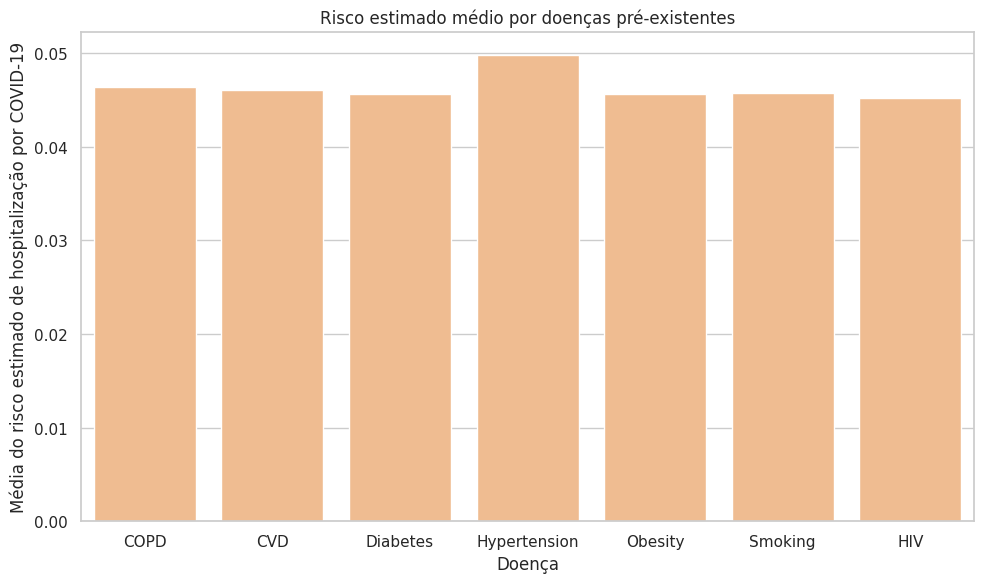

In [393]:
plt.figure(figsize=(10, 6))

#Gráfico de barras para explorar a primeira hipótese

#Salvando todas as doenças em um vetor só
doencas=['COPD', 'CVD', 'Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'HIV']

# Lista para guardar médias
valores_medio_risco = []

#Calculo dos valores medios de risco
for d in doencas:
    media = df[[d, 'Risk_High']].dropna().groupby(pd.qcut(df[d], q=4))[['Risk_High']].mean().mean()[0]
    valores_medio_risco.append(media)

sns.barplot(x=doencas, color= palette[5], y=valores_medio_risco)
plt.title("Risco estimado médio por doenças pré-existentes")
plt.xlabel('Doença')
plt.ylabel('Média do risco estimado de hospitalização por COVID-19')
plt.tight_layout()
plt.show()

Nesse gráfico, não é possível ver muita diferença entre o tipo de doença e a média de risco de gravidade por Covid-19. Apenas a hipertensão se destaca levemente como a mais influente. Precisaremos de análises mais a fundo para identificarmos com maior acurácia.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

Importante destacar que essas estatísticas não incluem o atributo ID pois ele é uma variável categórica.

In [395]:
# estatísticas descritivas básicas do dataset
df.describe()

,PM2.5,PM2.5_PopWtd,NO2,NO2_PopWtd,Access_City,Access_Walk,Diabetes,Obesity,Smoking,COPD,...,Risk_Age,Risk_High,Cases_MERS,Cases_SARS,WorldPop,WorldPop_Density,WorldPop_65,WorldPop_F,WorldPop_M,Sex_Ratio
count,9548.000000,9548.000000,9543.000000,9546.000000,10308.000000,10308.000000,228.000000,226.000000,191.000000,228.000000,...,174.000000,174.000000,177.000000,177.000000,1.030800e+04,10308.000000,10307.000000,1.027400e+04,1.027400e+04,10274.000000
mean,8.264367,8.375743,3.146884,4.502844,119.598518,256.715530,8.372368,21.190708,20.188482,2.477690,...,0.223168,0.045329,3.621469,33.903955,1.294231e+06,298.948313,0.145506,5.009522e-01,4.965706e-01,0.994241
std,4.204713,4.363831,2.067679,2.720144,357.502991,615.945034,3.888374,9.970938,8.676597,1.136356,...,0.032218,0.015444,34.784208,400.984565,2.182048e+07,1751.418475,0.059021,3.074349e-02,3.057526e-02,0.088351
min,1.187292,0.000000,0.014359,0.000000,0.000000,0.000000,1.000000,2.100000,3.700000,0.000004,...,0.170381,0.022777,0.000000,0.000000,5.546167e+01,0.004398,0.006098,5.237513e-07,5.161782e-07,0.762286
25%,6.006683,6.050412,1.722157,2.417673,30.545948,95.880177,5.700000,11.500000,13.850000,1.732862,...,0.206063,0.032678,0.000000,0.000000,7.796171e+03,8.318129,0.103410,4.944861e-01,4.880461e-01,0.954015
50%,7.453599,7.561198,2.768053,4.213986,56.622950,152.938575,7.750000,22.450000,19.000000,2.324073,...,0.221060,0.042689,0.000000,0.000000,2.061982e+04,20.885334,0.131522,5.041257e-01,4.956264e-01,0.982957
75%,9.221724,9.364113,3.967898,6.164864,101.040059,242.170402,10.725000,28.975000,25.450000,3.453564,...,0.233589,0.054718,0.000000,0.000000,7.205743e+04,62.735581,0.188425,5.116278e-01,5.053039e-01,1.021559
max,72.882309,75.245839,22.228638,22.086920,11252.231036,30090.349695,22.100000,40.799999,45.500000,4.747688,...,0.385763,0.085338,458.000000,5327.000000,1.442965e+09,33363.238281,0.500622,9.984883e-01,9.520218e-01,4.466216


### Moda

In [394]:
df.mode()

,ID,PM2.5,PM2.5_PopWtd,NO2,NO2_PopWtd,Access_City,Access_Walk,Diabetes,Obesity,Smoking,...,Risk_High,Cases_MERS,Cases_SARS,WorldPop,WorldPop_Density,WorldPop_65,WorldPop_F,WorldPop_M,Sex_Ratio,Risco_Categorizado
0,AD,14.477807,0.000000,9.817109,0.0,0.0,0.0,2.4,20.200001,19.000000,...,0.022777,0.0,0.0,1.695202e+06,1182.974217,0.218162,0.514989,0.484956,0.931371,Baixo
1,AE,NaN,14.163801,NaN,NaN,NaN,NaN,NaN,23.100000,21.799999,...,0.023301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Médio
2,AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.299999,25.100000,...,0.023925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alto
3,AG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.024751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.025019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10307,XK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10308,YE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10309,ZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10310,ZM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Muitos valores nulos podem ser observados.

### Mediana

In [402]:
df.median(numeric_only=True)

,0
PM2.5,7.453599
PM2.5_PopWtd,7.561198
NO2,2.768053
NO2_PopWtd,4.213986
Access_City,56.622950
Access_Motor,17.572606
Access_Walk,152.938575
Diabetes,7.750000
Obesity,22.450000
Smoking,19.000000


Medianas de grandezas muito diferentes.

Ex: WorldPop ->	20619.824020 x Risk_High ->	0.042689

### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [314]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
PM2.5,8.264367e+00
PM2.5_PopWtd,8.375743e+00
NO2,3.146884e+00
NO2_PopWtd,4.502844e+00
Access_City,1.195985e+02
Access_Motor,4.768212e+01
Access_Walk,2.567155e+02
Diabetes,8.372368e+00
Obesity,2.119071e+01
Smoking,2.018848e+01


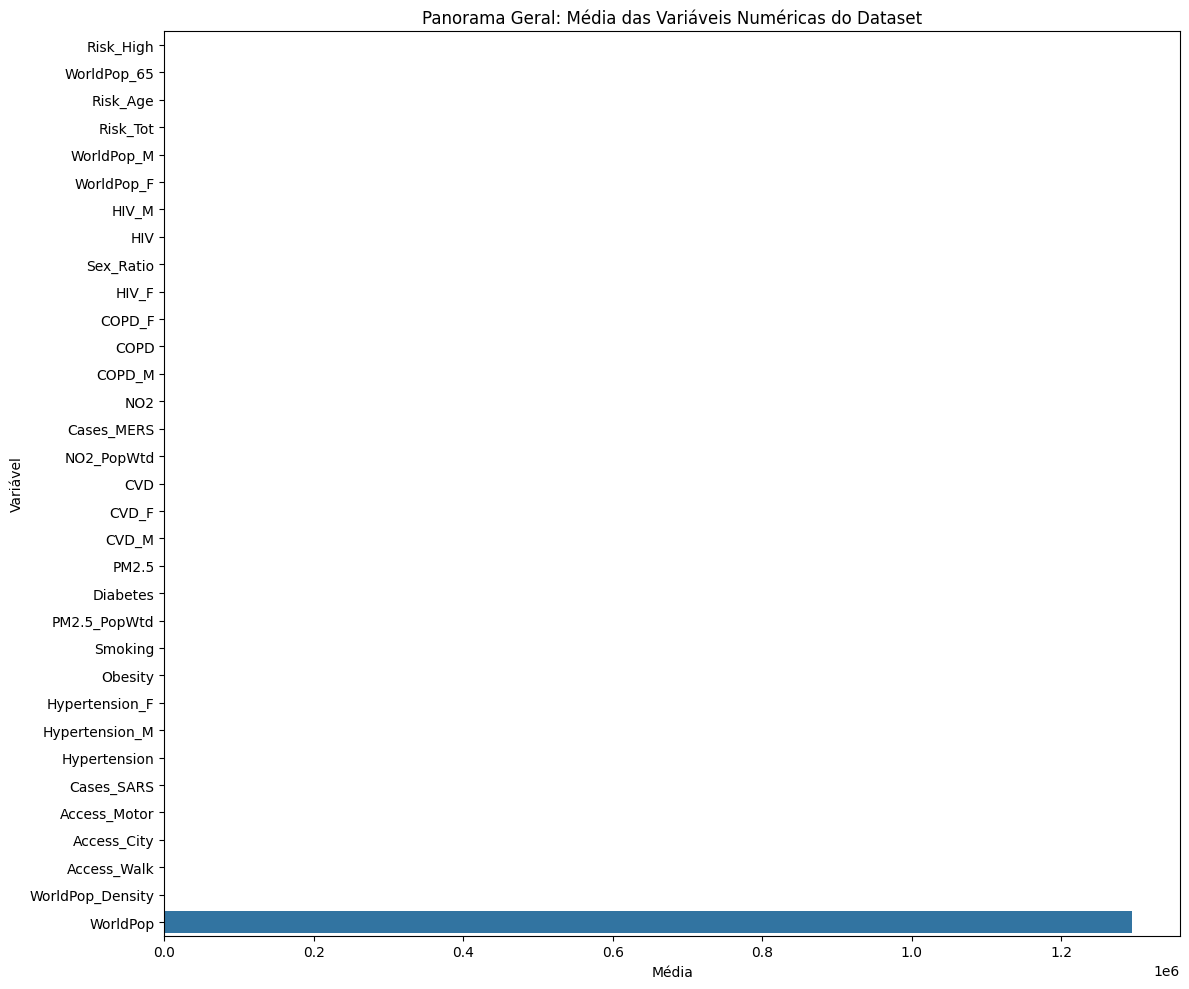

In [315]:
# Qual gráfico seria interessante usar pra mostrar a média?

# Remove a coluna 'ID' pois é categórica
df_numericas = df.drop(columns=['ID'])
df_numericas = df_numericas.select_dtypes(include='number')  # garante que só números ficam

# Calcula a média de todas as colunas
medias_gerais = df_numericas.mean().sort_values()

# Plotar gráfico
plt.figure(figsize=(12, 10))
sns.barplot(x=medias_gerais.values, y=medias_gerais.index)
plt.title('Panorama Geral: Média das Variáveis Numéricas do Dataset')
plt.xlabel('Média')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

Como a variável de População no Mundo (WorldPop) tem a média muito superior as demais (porque sua grandeza é muito superior), é muito difícil de identificar visualmente as outras médias.


- A sugestão é normalizar as variáveis

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [316]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
PM2.5,4.204713e+00
PM2.5_PopWtd,4.363831e+00
NO2,2.067679e+00
NO2_PopWtd,2.720144e+00
Access_City,3.575030e+02
Access_Motor,1.770039e+02
Access_Walk,6.159450e+02
Diabetes,3.888374e+00
Obesity,9.970938e+00
Smoking,8.676597e+00


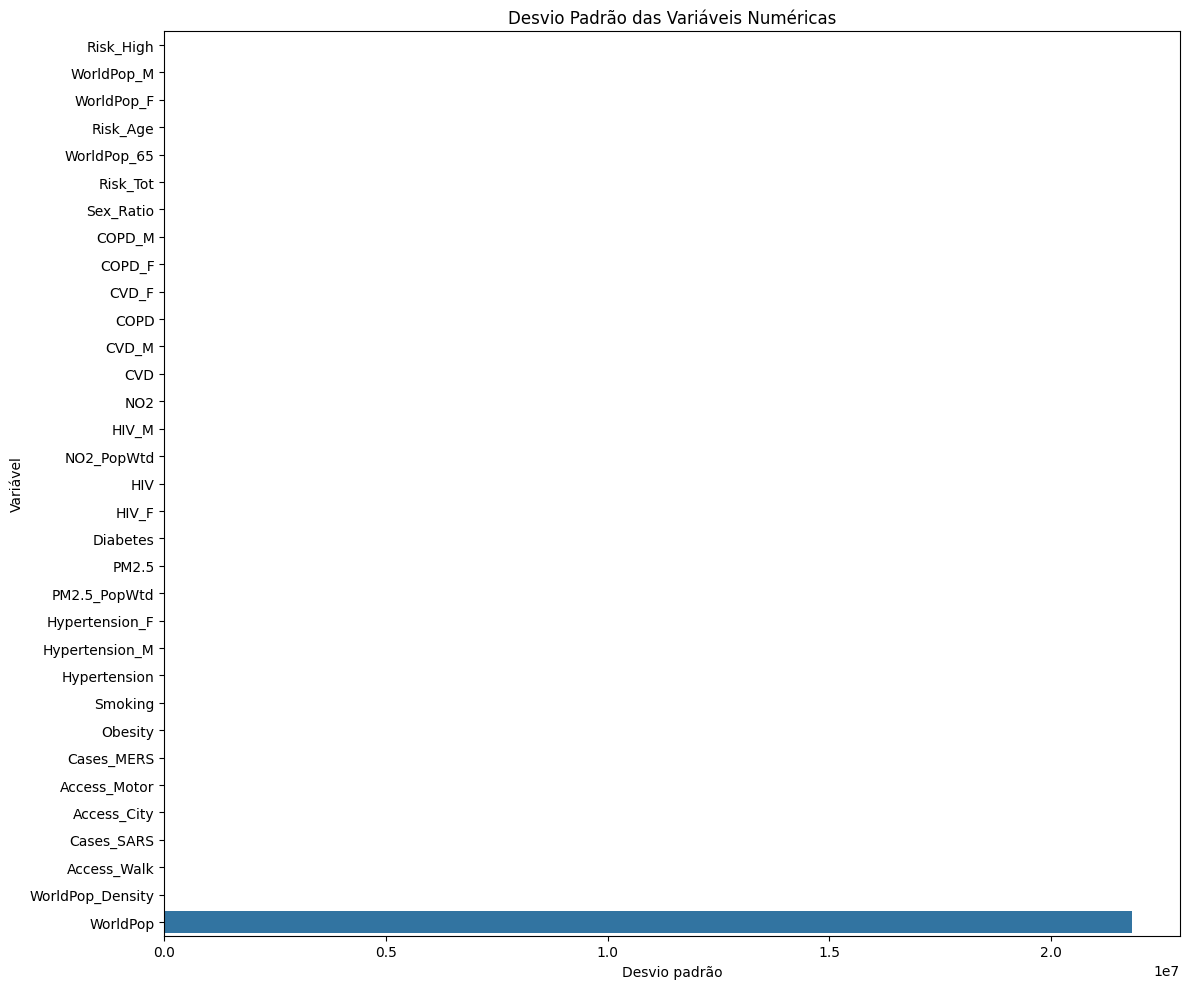

In [317]:
# Qual gráfico seria interessante usar pra mostrar o desvio padrão?

#Cálculo dos desvios padrão
desvios= df_numericas.std().sort_values()

#Plot do Gráfico de Barras
plt.figure(figsize=(12, 10))
sns.barplot(x=desvios.values, y=desvios.index)
plt.title('Desvio Padrão das Variáveis Numéricas')
plt.xlabel('Desvio padrão')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

O gráfico fica muito parecido com o da média. Isto porque avariável de População no Mundo (WorldPop) tem grandeza muito superior as demais. E acaba sendo muito difícil de identificar visualmente os outros desvios padrões.

- A sugestão é normalizar as variáveis

### Valores Faltantes

In [403]:
df.isnull().sum()

,0
ID,1
PM2.5,6846
PM2.5_PopWtd,6846
NO2,6851
NO2_PopWtd,6848
Access_City,6086
Access_Motor,6086
Access_Walk,6086
Diabetes,16166
Obesity,16168


Grande parte do dataset está com valores faltando. Precisaremos analisar e decidir como tratá-los.

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.




### Concentração de PM2.5 (partículas de plástico com diâmetro de 2,5 μm por m³)

Exibindo a distribuição dessa variável pois queremos saber se a qualidade do ambiente e do clima urbano interfere na incidência de doença pulmonar crônica (COPD).

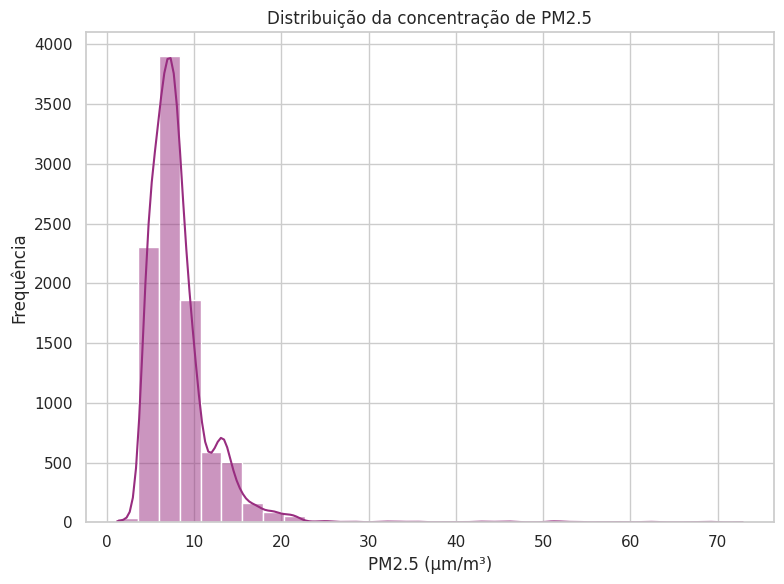

In [367]:
plt.figure(figsize=(8, 6))

#Definindo paleta de cores para esse MVP
palette = sns.color_palette("magma")


# Histograma de PM2.5 (um dos atributos)
sns.histplot(df['PM2.5'].dropna(), bins=30, color = palette[2], kde=True)
plt.title('Distribuição da concentração de PM2.5')
plt.xlabel('PM2.5 (µm/m³)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

In [319]:
#Breve análise de simetria
df['PM2.5'].skew()

np.float64(5.458002679528977)

O histograma mostra a distribuição da concentração de partículas de plástico por metro cúbico. A curva de densidade estimada (KDE) nos indica que a distribuição parece unimodal O valor de skewness de 5.46 indica forte assimetria positiva. Isso sugere que, embora a maioria das regiões tenha concentrações baixas de poluentes, há algumas áreas com níveis extremamente altos. Mesmo comparativamente com baixa frequência, puxa a cauda da distribuição para a direita.


### *Taxa de Obesidade*

Verificar a incidência da doença na população que foi mapeada pois a obesidade é fortemente associada a desfechos graves da COVID-19 segundo estudos epidemiológicos. E queremos ver na prática qual doença pré-existente apresenta maior fator de risco estimado para hospitalização por COVID-19 (Risk_High).

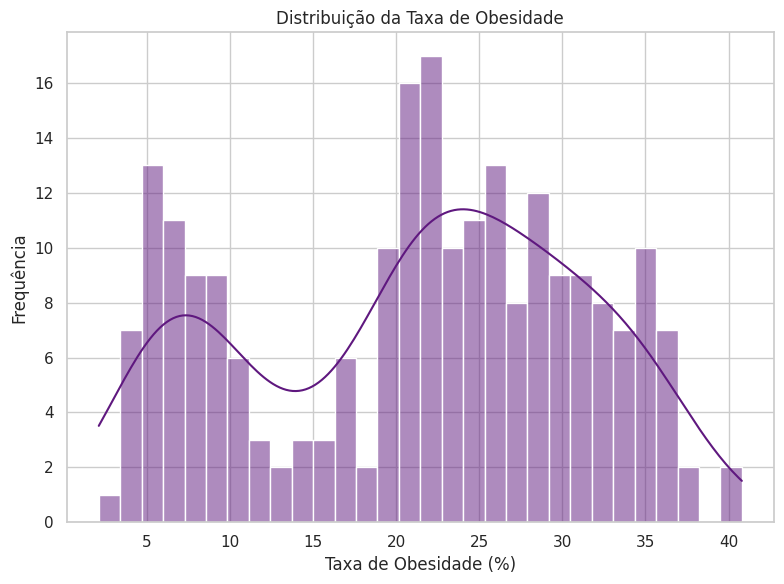

In [370]:
plt.figure(figsize=(8, 6))

# Histograma da Taxa de Obesidade (um dos atributos)
sns.histplot(df['Obesity'], bins=30, color=palette[1], kde=True)
plt.title('Distribuição da Taxa de Obesidade')
plt.xlabel('Taxa de Obesidade (%)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

In [321]:
df['Obesity'].skew()

np.float64(-0.25407229460033137)

A curva de densidade estimada (KDE) nos indica que a distribuição é bimodal pois possui 2 picos. Além disso, a Taxa de Obesidade possui distribuição assimétrica negativamente pois o valor de skewness de
-0.25 o que indica leve assimetria para esquerda. Isso implica que, embora visualmente tenhamos taxas de obesidade de até 40 %, no total, existem mais regiões com taxas menores de obesidade. A frequência das taxas mais baixas parece estar presente de forma um pouco mais dispersa, o que resultou nesse valor negativo.


## Boxplot

Para entender as diferenças entre o risco de hospitalização por COVID-19, devemos olhar como se comportam os valores por faixa. Isso nos permite visualizar as distribuições de doenças pré-existentes por meio de boxplots.


In [322]:
# Criando nova coluna para categorizar o risco (Risk_High) em faixas
df['Risco_Categorizado'] = pd.qcut(df['Risk_High'], q=3, labels=['Baixo', 'Médio', 'Alto'])

### *Taxa de Obesidade* por Faixa de Risco (Risk_High)


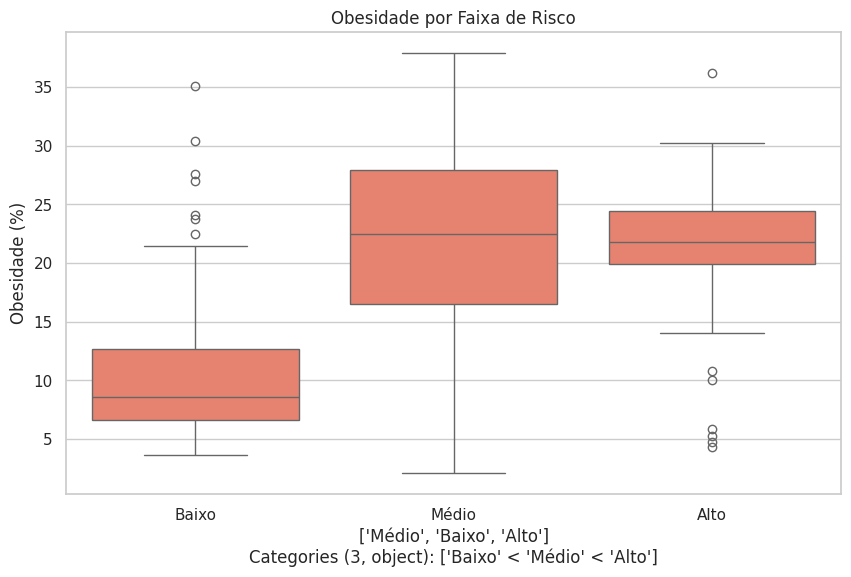

In [373]:
# Boxplot da taxa de obesidade por faixa de risco

plt.figure(figsize=(10, 6))
sns.boxplot(x='Risco_Categorizado', y='Obesity', color = palette[4], data=df)
plt.title('Obesidade por Faixa de Risco')
plt.xlabel(df['Risco_Categorizado'].unique().dropna())
plt.ylabel('Obesidade (%)')
plt.show()

O boxplot acima demonstra claramente que quem possui obesidade maior que 15% já tem mais chances de pertencer a um médio ou alto risco de hospitalização por COVID-19. As médias do risco médio e alto possuem quase a mesma correspondência em % de obesidade, indicando ali que depois esse valor de 20 e poucos (20-25) a % de obesidade não influencia tanto assim no risco de internação por COVID-19.

### *Tempo de Acesso à cidade mais próxima* por Faixa de Risco (Risk_High)

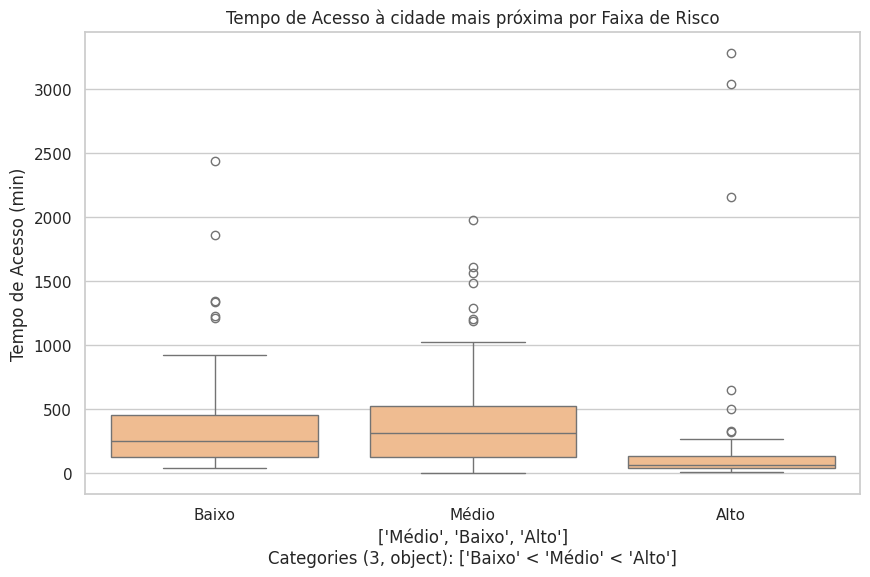

In [374]:
# Boxplot do tempo de acesso à cidade mais próxima por faixa de risco

plt.figure(figsize=(10, 6))
sns.boxplot(x='Risco_Categorizado', y='Access_City',color = palette[5], data=df)
plt.title('Tempo de Acesso à cidade mais próxima por Faixa de Risco')
plt.xlabel(df['Risco_Categorizado'].unique().dropna())
plt.ylabel('Tempo de Acesso (min)')
plt.show()

Aparentemente essa variável que contabiliza a quantidade de minutos para acesso à uma outra cidade com infraestrutura para internação de COVID-19, não tem relação direta com a Faixa de Risco. Na minha hipótese poderia ter alguma relação, visto que as pessoas que tem a saúde com acesso mais rápido, sem muito deslocamento, tem maior acesso à tratamentos e prevenção. Isso poderia diminuir o Risco de internação por COVID-19, mas não é o que se pôde constatar.

### *Tempo de caminhada até o serviço de saúde mais próximo* por Faixa de Risco (Risk_High)

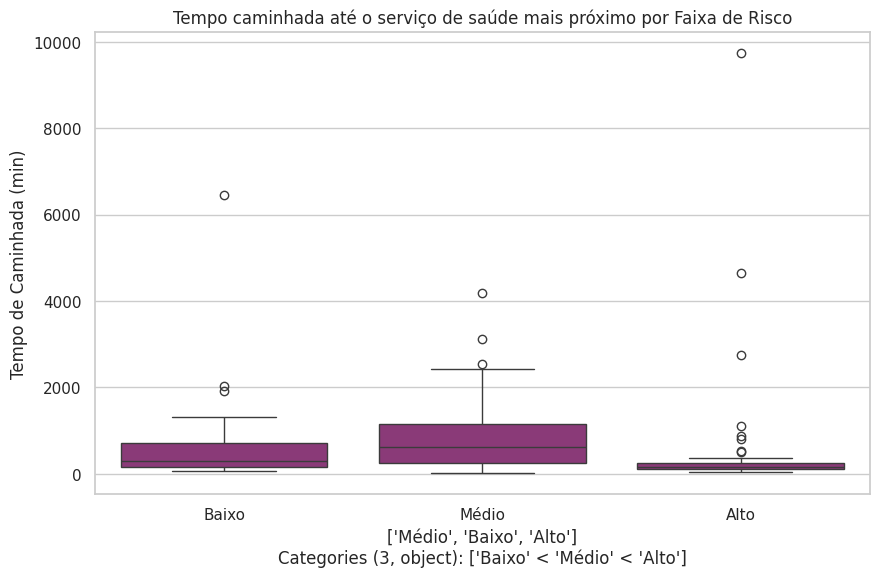

In [392]:
# Boxplot do tempo de acesso a pé a serviço de saúde por faixa de risco

plt.figure(figsize=(10, 6))
sns.boxplot(x='Risco_Categorizado', y='Access_Walk',color = palette[2], data=df)
plt.title('Tempo caminhada até o serviço de saúde mais próximo por Faixa de Risco')
plt.xlabel(df['Risco_Categorizado'].unique().dropna())
plt.ylabel('Tempo de Caminhada (min)')
plt.show()

Aparentemente essa variável que contabiliza a quantidade de minutos para acesso à um local com infraestrutura para internação de COVID-19, não tem relação direta com a Faixa de Risco. Isso pode ser notado quando olhamos a faixa de Alto Risco e ela visualmente parece ter Q1, média e Q3 abaixo do valor correspondente para a faixa de Baixo Risco.

## Gráfico de dispersão
A aposta nesse gráfico é para tentar entender a relação da doença crônica pulmonar com a poluição atmosférica local.



Esse primeiro gráfico é apenas analisando o material particulado de plástico *PM2.5* com relação ao índice relativo à incidência da doença pulmonar *COPD*.

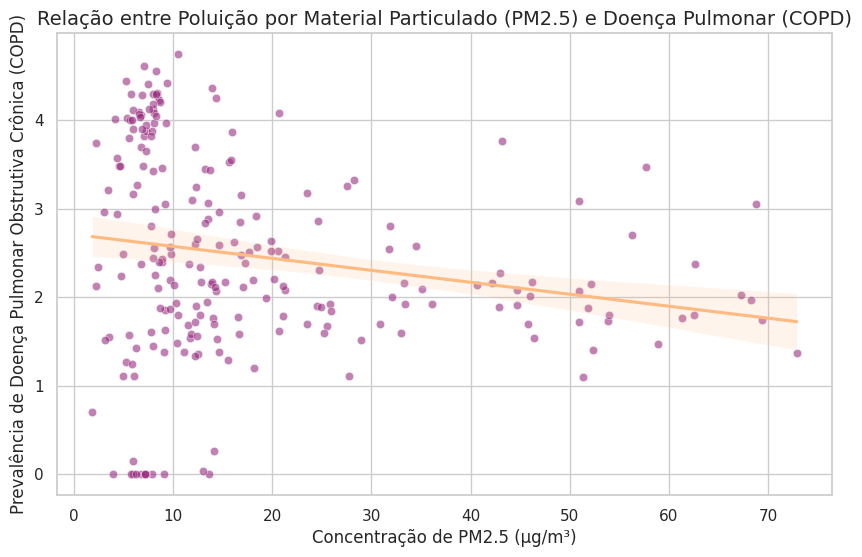

In [375]:
plt.figure(figsize=(10, 6))
#Gerando o gráfico de dispersão. Alpha é para transparência dos pontos
sns.scatterplot(x='PM2.5', y='COPD', data=df, color=palette[2], alpha=0.6)
#Criando uma linha de tendência com incerteza considerada (sombreado)
sns.regplot(x='PM2.5', y='COPD', data=df, scatter=False, color=palette[5])

plt.title('Relação entre Poluição por Material Particulado (PM2.5) e Doença Pulmonar (COPD)', fontsize=14)
plt.xlabel('Concentração de PM2.5 (µg/m³)', fontsize=12)
plt.ylabel('Prevalência de Doença Pulmonar Obstrutiva Crônica (COPD)', fontsize=12)
plt.grid(True)
plt.show()

Aparentemente não tem muita correlação entre as duas variáveis. Mas depois da concentração de 20 *PM2.5* não há mais valores menores que 1 referentes à *COPD*. Ao mesmmo tempo, os maiores valores referentes a doença aparecem na primeira parte esquerda do gráfico que são quando as concentrações do particulado ainda estão baixas. Ou seja, não há uma relação direta indicando o aumento proporcional. Pela curva ser de inclinação decrescente, indica na verdade uma correspondência negativa. Mas na prática, pela visualização do gráfico de dispersão, o comportamente não parece ser tão relacionado assim.

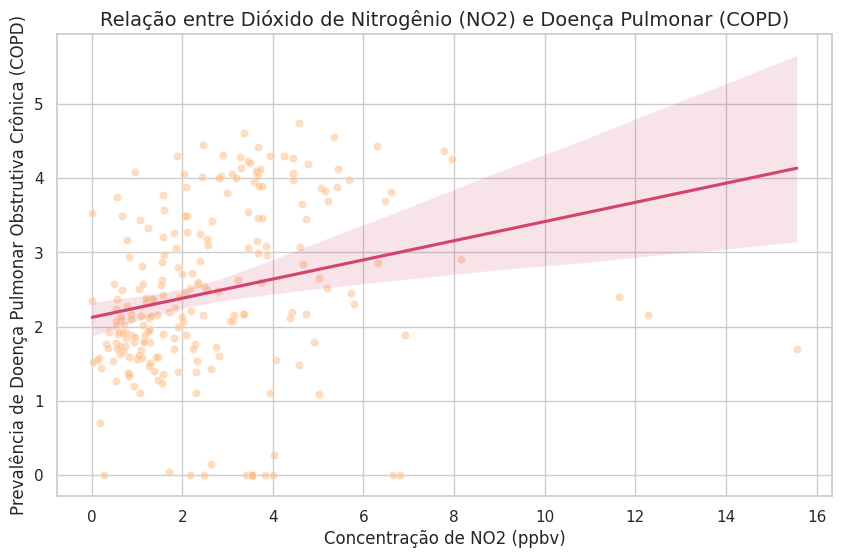

In [378]:
plt.figure(figsize=(10, 6))
#Gerando o gráfico de dispersão. Alpha é para transparência dos pontos
sns.scatterplot(x='NO2', y='COPD', data=df, color=palette[5], alpha=0.5)
#Criando uma linha de tendência com incerteza considerada (sombreado)
sns.regplot(x='NO2', y='COPD', data=df, scatter=False, color=palette[3])

plt.title('Relação entre Dióxido de Nitrogênio (NO2) e Doença Pulmonar (COPD)', fontsize=14)
plt.xlabel('Concentração de NO2 (ppbv)', fontsize=12)
plt.ylabel('Prevalência de Doença Pulmonar Obstrutiva Crônica (COPD)', fontsize=12)
plt.grid(True)
plt.show()

A linha de tendência é levemente inclinada positivamente, que indica que aumento da concentração de *NO2* é relacionado com maior incidência de Doença Pulmonar Crônica (*COPD*). A incerteza vai aumentando conforme a concentração do gás aumenta, mas a curva se mantém positiva. A prevalência da doença pode ser influenciada por outros fatores do dataset.



## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos do dataset. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [327]:
# Seleciona apenas colunas numéricas e remove 'ID' (variável de identificação PK)
df_numerico = df.drop(columns=['ID']).select_dtypes(include='number')

# Exibe a correlação de todas as variáveis com 'Risk_High'
print("\nCorrelação com Alto Risco de Internação por Covid-19:\n")
print(df_numerico.corr()['Risk_High'].sort_values(ascending=False))


Correlação com Alto Risco de Internação por Covid-19:

Risk_High           1.000000
Risk_Tot            0.957185
WorldPop_65         0.842346
Hypertension_M      0.754501
Hypertension_F      0.582491
Smoking             0.577116
Hypertension        0.549729
COPD_M              0.488897
Obesity             0.441673
NO2                 0.425348
NO2_PopWtd          0.323875
CVD_M               0.321718
COPD                0.257170
CVD_F               0.120327
COPD_F              0.114428
CVD                 0.110545
Diabetes            0.083644
WorldPop_F          0.043881
Cases_SARS          0.027209
WorldPop_Density   -0.010123
WorldPop           -0.012133
Cases_MERS         -0.024682
Access_Walk        -0.073001
Risk_Age           -0.111405
HIV_M              -0.127564
HIV                -0.144180
HIV_F              -0.154880
Access_City        -0.174288
WorldPop_M         -0.194189
Sex_Ratio          -0.202137
PM2.5_PopWtd       -0.427411
PM2.5              -0.457315
Access_Motor    

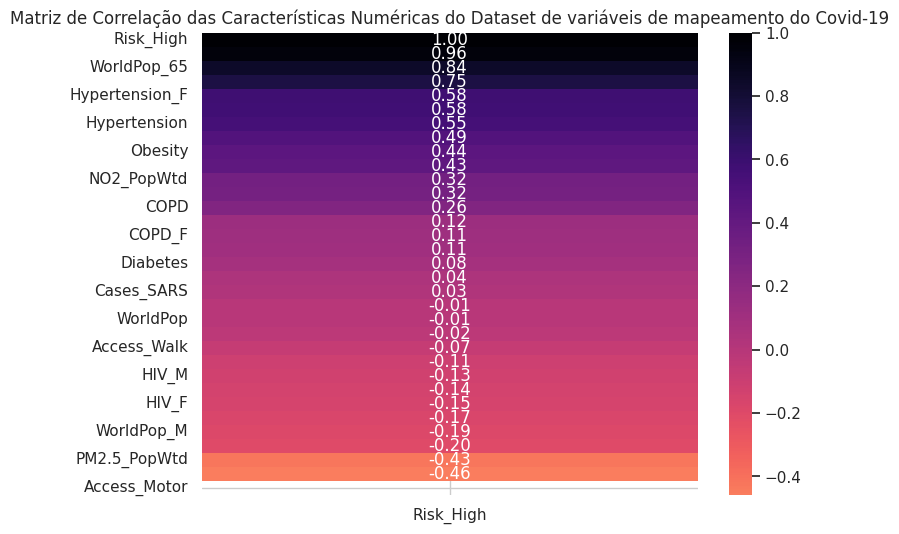

In [382]:
plt.figure(figsize=(8, 6))

#Criando um df para correlação de variáveis numéricas
df_corr = df_numerico.corr()

#Mapa de calor das variáveis numéricas versus Risk High. Adicionando um _r para a cor para trazer o mais escuro para o valor mais alto de correspondência positiva (1.0)
sns.heatmap(df_corr[['Risk_High']].sort_values(by='Risk_High',ascending=False), annot=True, cmap='magma_r', fmt=".2f", center=0)
plt.title('Matriz de Correlação das Características Numéricas do Dataset de variáveis de mapeamento do Covid-19')
plt.show()

O mapa de calor da matriz de correlação revela fortes correlação positivas entre *Risk_High* (proporção de indivíduos de alto risco) e *Risk_Tot* (proporção de indivíduos com pelo menos 1 fator de risco). Isso faz muito sentido porque quem já tem uma comorbidade entra nesse grupo de alto risco.

Uma outra variável que está diretamente relacionada (correlação positiva) é a *WorldPop_65* que representa a proporção de população idosa, o que também é explicável visto que é a parcela da população que tem uma resposta imunológica mais debilitada e requer mais atenção.

Uma explicação possível para as variáveis com correlação negativa como *WorldPop_Density* e *WorldPop* é que onde há mais densidade de pessoas é mais provável de ser uma área urbana e ter mais recursos, podendo diminuir a gravidade dos casos.

Para as correlações negativas *Access_City* e *Access_Walk* pode-se admitir que quanto mais próximo o serviço de saúde ou centro urbano, mais chance de diagnóstico precoce ou tratamento. E por conta disso o risco de hospitalização grave diminui.

Uma correlação negativa inesperada é a feita com os poluentes *PM2.5* e *PM2.5_PopWtd* pois indica que quanto mais poluído o ar, menor a chance de gravidade de Covid-19.

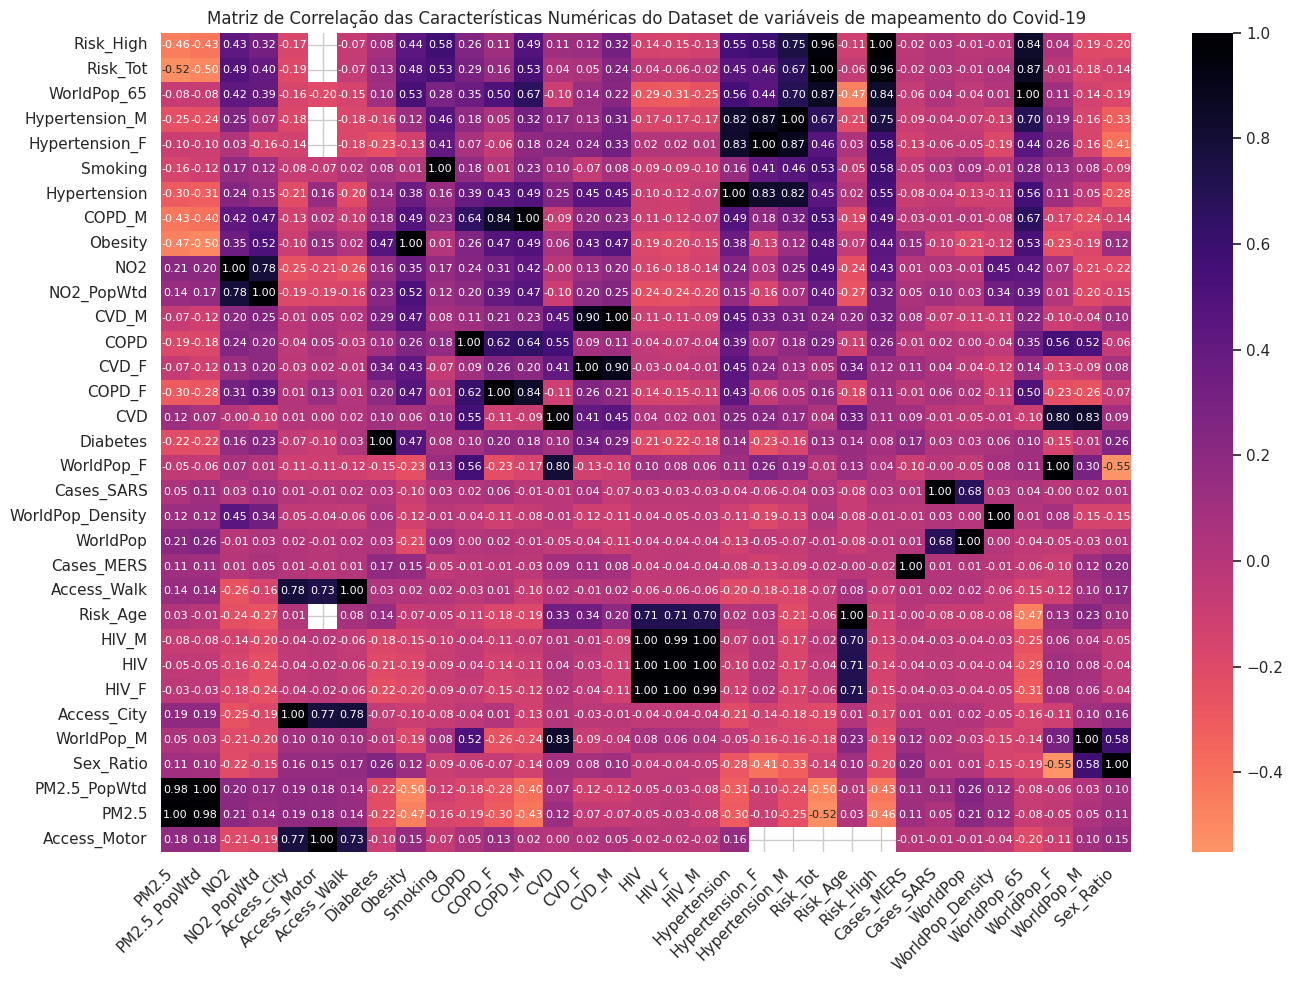

In [383]:
# Mapa de calor de todas as variáveis numéricas
plt.figure(figsize=(14, 10))
sns.heatmap(df_corr.sort_values(by='Risk_High',ascending=False), annot=True, cmap='magma_r', fmt=".2f", center=0, annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right')  # rotaciona colunas
plt.yticks(rotation=0)               # deixa os nomes das linhas horizontais
plt.title('Matriz de Correlação das Características Numéricas do Dataset de variáveis de mapeamento do Covid-19')
plt.tight_layout()
plt.show()



*   Correlação esperada das variáveis gerais com as criadas por gênero.
Ex: COPD e COPD_F/M
*   Acess_City e Access_Motor são altamente correlacionadas (>70%) indicando que o acesso à serviços de saúde entre cidades e de deslocamento motorizados andam juntos.
*   *PM2.5* tem correlação negativa com *Risk_High*. O que deverá ser aprofundado.
*   *NO2_PopWtd* tem correlação também negativa com *Risk_High*. Isso indica que os locais com dióxido de nitrogênio mais equilibrado por quantidade de pessoas tendem a ter o menor risco estimado.





## Tratamento de Valores Nulos

O dataset Unificado do Covid-19 possui valores nulos e o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.



Na matriz de correlação, o item anterior, não foi possível exibir a correção com a variável Access_Motor e isso
provavelmente ocorreu porque ela possui alguns valores nulos. No código abaixo irei contar quantas entradas nulas existem para essa variável.

In [330]:
df['Access_Motor'].isna().sum()

np.int64(6086)

Identificarei a proporção de nulos para essa variável comparando com o tamanho do dataset

In [331]:
# Proporção de dados ausentes
df['Access_Motor'].isna().mean()

np.float64(0.3712333780651458)

Isso quer dizer que aproximadamente 37% dos dados sobre o tempo que se leva até uma unidade de saúde mais próxima utilizando um veículo motorizado, estão faltando no dataset.

Como a variável é importante para responder a correlação de acesso a saúde x risco agravamento por Covid-19, vou utilizar somente a parte do dadaset onde os dados dessa variável estão contidos.

In [332]:
#Eliminando os valores vazios (NaN) de Access_Motor
df_sem_nulos = df[['Access_Motor', 'Risk_High']].dropna()
df_sem_nulos

,Access_Motor,Risk_High
1,0.0,0.035151
2,0.0,0.030457
3,0.0,0.049608
4,0.0,0.056346
5,0.0,0.065903
...,...,...
16383,0.0,0.042730
16390,0.0,0.028520
16391,0.0,0.052587
16392,0.0,0.025082


In [333]:
#Verificando quantos valores 0 tem na variável Access_Motor
df['Access_Motor'].eq(0).sum()

np.int64(229)

Como parece que a variável detém muitos valores 0 isso pode representar um dado inválido. Como um erro, ausência de medição ou um valor que é utilizado para o caso de não terem esse dado (default).

In [334]:
#Verificando a proporção de nulos
df_sem_nulos['Access_Motor'].eq(0).mean()

np.float64(1.0)

Como todos os valores do dataset estão zerados, decidi excluir a coluna Access_Motor. Minha escolha foi porque não será possível extrair nenhuma informação desses dados, parece que esse valor é algo default e que não houve aferição.

In [335]:
#Removendo a coluna Access_Motor
df = df.drop(columns=['Access_Motor'])

In [336]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
ID,1
PM2.5,6846
PM2.5_PopWtd,6846
NO2,6851
NO2_PopWtd,6848
Access_City,6086
Access_Walk,6086
Diabetes,16166
Obesity,16168
Smoking,16203


O dataset possui muitos valores nulos então vou remover as linhas onde todas as variáveis são vazias, exceto a *ID*.

In [337]:
#Removendo linhas que têm todos os valores nulos exceto 'ID'
df = df[~df.drop(columns='ID').isnull().all(axis=1)]

In [338]:
#Verificando se a remoção foi bem sucedida
(df.drop(columns='ID').isnull().all(axis=1)).sum()

np.int64(0)

O resultado foi 0. Portanto, não existe mais nenhuma linha vazia (exceto variável ID) nesse dataset.

In [339]:
#verificando porcentagem valores nulos por variável
percentuais_nulos = df.isna().mean().sort_values(ascending=False)
print(percentuais_nulos)

Hypertension_M        0.983225
Hypertension_F        0.983225
Risco_Categorizado    0.983128
Risk_High             0.983128
Risk_Tot              0.983128
Risk_Age              0.983128
Cases_MERS            0.982837
Cases_SARS            0.982837
Smoking               0.981480
Hypertension          0.978280
Obesity               0.978086
HIV_M                 0.977892
COPD                  0.977892
Diabetes              0.977892
CVD                   0.977892
COPD_M                0.977892
COPD_F                0.977892
CVD_F                 0.977892
HIV_F                 0.977892
HIV                   0.977892
CVD_M                 0.977892
NO2                   0.074663
NO2_PopWtd            0.074372
PM2.5                 0.074178
PM2.5_PopWtd          0.074178
Sex_Ratio             0.003782
WorldPop_F            0.003782
WorldPop_M            0.003782
WorldPop_65           0.000582
Access_City           0.000485
WorldPop_Density      0.000485
Access_Walk           0.000485
WorldPop

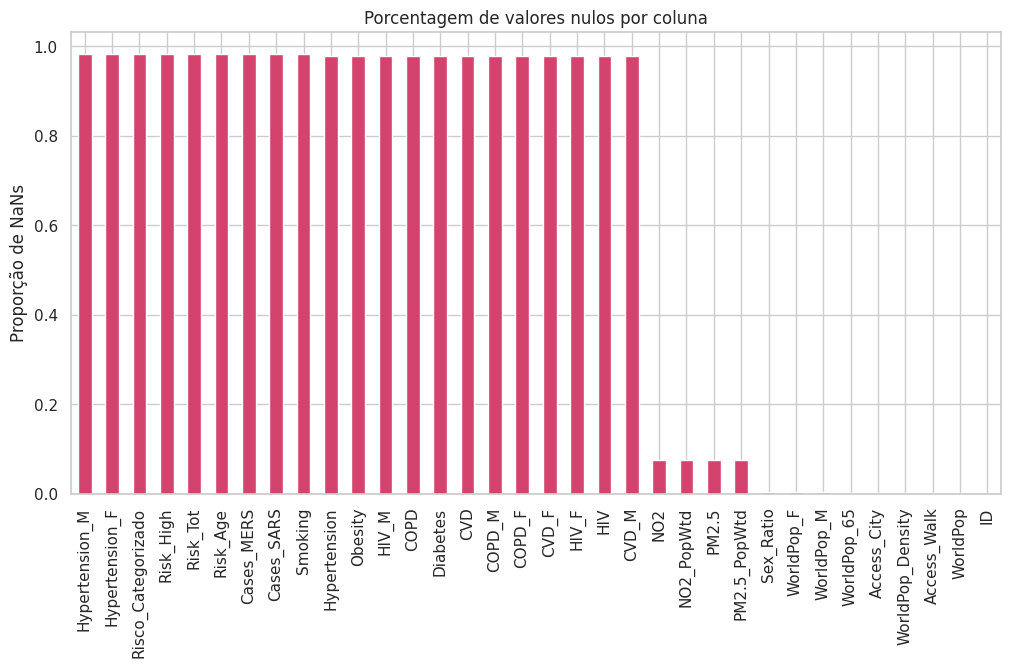

In [384]:
#Vou colocar isso em um gráfico para ajudar na análise
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
percentuais_nulos.plot(kind='bar',color=palette[3])
plt.title('Porcentagem de valores nulos por coluna')
plt.ylabel('Proporção de NaNs')
plt.show()


Como estou utilizando a variável *Risk_High* e ela possui muitos nulos, vou filtrar apenas os valores não nulos.

In [341]:
#Selecionando valores válidos e atribuindo ao dataframe df_valid
df_valid = df[df['Risk_High'].notna()].copy()

Nesse próximo passo irei selecionar somente as colunas que irei usar para cada hipótese e gerar um novo dataframe otimizado.

In [342]:
#Separando variáveis que serão úteis
colunas_utilizadas = [
    'Risk_High',

    # Hipótese 1
    'Diabetes', 'Obesity', 'Smoking',
    'COPD', 'COPD_F', 'COPD_M',
    'CVD', 'CVD_F', 'CVD_M',
    'HIV', 'HIV_F', 'HIV_M',
    'Hypertension', 'Hypertension_F', 'Hypertension_M',

    # Hipótese 2
    'PM2.5', 'PM2.5_PopWtd',
    'NO2', 'NO2_PopWtd',

    # Hipótese 3
    'Access_Walk', 'Access_City'
]

df_otimizado = df_valid[colunas_utilizadas]

In [343]:
#verificando porcentagem valores nulos por variável
percentuais_nulos = df.isna().mean().sort_values(ascending=False)
print(percentuais_nulos)

Hypertension_M        0.983225
Hypertension_F        0.983225
Risco_Categorizado    0.983128
Risk_High             0.983128
Risk_Tot              0.983128
Risk_Age              0.983128
Cases_MERS            0.982837
Cases_SARS            0.982837
Smoking               0.981480
Hypertension          0.978280
Obesity               0.978086
HIV_M                 0.977892
COPD                  0.977892
Diabetes              0.977892
CVD                   0.977892
COPD_M                0.977892
COPD_F                0.977892
CVD_F                 0.977892
HIV_F                 0.977892
HIV                   0.977892
CVD_M                 0.977892
NO2                   0.074663
NO2_PopWtd            0.074372
PM2.5                 0.074178
PM2.5_PopWtd          0.074178
Sex_Ratio             0.003782
WorldPop_F            0.003782
WorldPop_M            0.003782
WorldPop_65           0.000582
Access_City           0.000485
WorldPop_Density      0.000485
Access_Walk           0.000485
WorldPop

Antes de avançar para o Pré-Processamento de Dados, irei verificar se ainda existem colunas/variáveis com algum valor nulo nesse df otimizado que já foi filtrado.

In [344]:
#Contabilizando a soma dos valores NaN dentro desse df_otimizado
df_otimizado.isna().sum().sort_values(ascending=False)

,0
Smoking,35
Hypertension,3
Hypertension_F,3
Hypertension_M,3
PM2.5,1
Obesity,1
PM2.5_PopWtd,1
NO2,1
NO2_PopWtd,1
Diabetes,0


Como ainda existem muitos valores faltantes para a variável *Smoking*, irei avaliar a distribuição normal para verificar se usarei a média ou a mediana para imputar valores.

In [345]:
#Verificando tipo de distribuição
df['Smoking'].skew()

np.float64(0.6452965890943805)

Como existe uma assimetria positiva para a variável, o recomendável é utilizar a mediana. Já que a média puxaria para o alto os valore por conta dos outliers. A maioria dos valores estão concentrados à esquerda do pico e a mediana vai conseguir representar essa tendência dos dados.

In [386]:
#Preenchendo valores faltantes na Coluna *Smoking* com a mediana
df_otimizado.fillna({'Smoking': df_otimizado['Smoking'].median()}, inplace=True)

Vou aproveitar e preencher com a mediana também as variáveis com poucos nulos.

In [389]:
colunas_com_poucos_nulos = [
    'Hypertension_F', 'Hypertension', 'Hypertension_M',
    'PM2.5', 'Obesity',
    'PM2.5_PopWtd', 'NO2', 'NO2_PopWtd'
]

for col in colunas_com_poucos_nulos:
  df_otimizado[col].fillna(df_otimizado[col].median())

Nesse próximo passo, vou verificar se os valores foram preenchidos e se podemos seguir para o Pré-Processamento de Dados

In [348]:
#Verificando imputação
df_otimizado.isna().sum()

,0
Risk_High,0
Diabetes,0
Obesity,0
Smoking,0
COPD,0
COPD_F,0
COPD_M,0
CVD,0
CVD_F,0
CVD_M,0


*Hypertension_F*, *Hypertension*, *Hypertension_M*, *PM2.5*, *Obesity*,
*PM2.5_PopWtd*, *NO2*, *NO2_PopWtd* e *Smoking* devidamente preenchidas, podemos avançar para próxima etapa.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [349]:
# Separar features (X) e target (y)
X = df_otimizado.drop('Risk_High', axis=1)
y = df_otimizado['Risk_High']

In [350]:
#Verificando se é possível fazer estratificação
y.value_counts()

,count
Risk_High,
0.035151,1
0.030457,1
0.049608,1
0.056346,1
0.065903,1
...,...
0.042730,1
0.028520,1
0.052587,1


Como a predição usará um método de regressão, a estratificação não é utilizada. Só é feita estratificação para grupos de valores, ou variáveis categóricas com mais de uma ocorrência para cada categoria/grupo.

In [351]:
# Dividir os dados em conjuntos de treino e teste, sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [352]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (121, 21)
Dimensões de X_test: (53, 21)
Dimensões de y_train: (121,)
Dimensões de y_test: (53,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



Essa etapa é necessária porque temos variáveis com valores muito diferentes entre si. Tais como *Access_City* (tempo em minutos), *Obesity* (em %), *PM2.5* (µg/m³), *WorldPop* (população absoluta). Sem essa normalização as variáveis com valores maiores puxariam o modelo para aquela direção. O que não

In [353]:
# Inicializar o MinMaxScaler
scaler= MinMaxScaler()

In [354]:
# Aprende min e max APENAS de X_train
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler.transform(X_test)

In [355]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [356]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   Diabetes   Obesity   Smoking      COPD    COPD_F    COPD_M       CVD  \
0  0.233766  0.622905  0.782396  0.621016  0.397950  0.711467  0.746812   
1  0.363636  0.564246  0.080685  0.551292  0.411352  0.531393  0.467630   
2  0.298701  0.050279  0.420538  0.498797  0.285558  0.536935  0.571856   
3  0.454545  0.824022  0.154034  0.261285  0.088682  0.189640  0.709094   
4  0.266234  0.505587  0.442543  0.448674  0.234004  0.470627  0.777709   

      CVD_F     CVD_M       HIV  ...     HIV_M  Hypertension  Hypertension_F  \
0  0.459320  0.603593  0.000719  ...  0.001346      1.000000        1.000000   
1  0.041498  0.062346  0.009380  ...  0.016698      0.439382        0.267953   
2  0.233968  0.231424  0.020988  ...  0.025436      0.547019        0.490340   
3  0.459692  0.480795  0.043644  ...  0.054256      0.512687        0.318924   
4  0.540188  0.626617  0.000437  ...  0.000852      0.931809        0.904854   

   Hypertension

A normalização deu certo e todas as variáveis de X estão apresentando valores entre 0 e 1. Essa transformação vai possibilitar a regressão linear de forma assertiva.

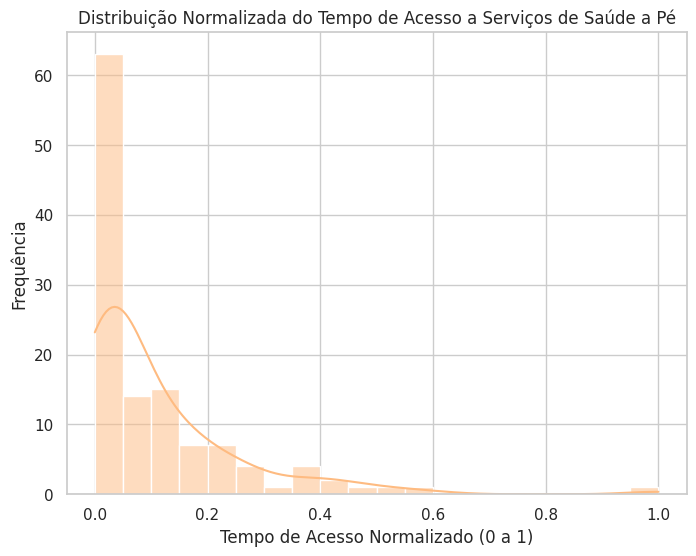

In [390]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['Access_Walk'], color= palette[5], kde=True)
plt.title('Distribuição Normalizada do Tempo de Acesso a Serviços de Saúde a Pé')
plt.xlabel('Tempo de Acesso Normalizado (0 a 1)')
plt.ylabel('Frequência')
plt.show()

O histograma de *Access_Walk* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original e transformando o tempo registrado que anteriormente era em minutos.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [358]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [359]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [360]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [361]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   Diabetes   Obesity   Smoking      COPD    COPD_F    COPD_M       CVD  \
0 -0.521524  0.689565  1.763695  0.792680  0.240304  1.184686  0.370298   
1  0.117508  0.458863 -1.577522  0.410265  0.303970  0.371572 -1.485613   
2 -0.202008 -1.562530  0.040698  0.122346 -0.293628  0.396598 -0.792751   
3  0.564830  1.480545 -1.228266 -1.180336 -1.228912 -1.171591  0.119563   
4 -0.361766  0.228160  0.145475 -0.152565 -0.538544  0.097188  0.575692   

      CVD_F     CVD_M       HIV  ...     HIV_M  Hypertension  Hypertension_F  \
0  0.010809  0.614844 -0.357081  ... -0.363712      2.900779        2.954188   
1 -2.040456 -1.848158 -0.300189  ... -0.258782     -0.767017       -1.020908   
2 -1.095542 -1.078752 -0.223928  ... -0.199060     -0.062814        0.186679   
3  0.012635  0.056040 -0.075091  ... -0.002084     -0.287430       -0.744131   
4  0.407827  0.719618 -0.358936  ... -0.367089      2.454647        2.437537   

   Hypertension

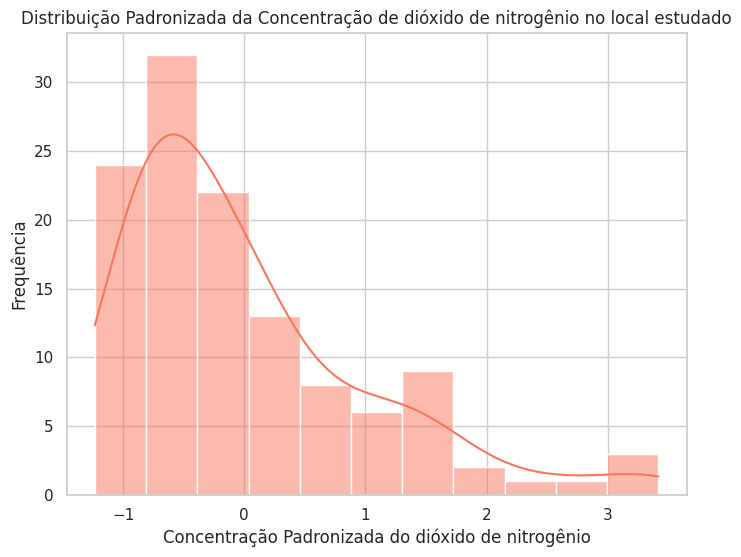

In [391]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['NO2'], color=palette[4], kde=True)
plt.title('Distribuição Padronizada da Concentração de dióxido de nitrogênio no local estudado')
plt.xlabel('Concentração Padronizada do dióxido de nitrogênio')
plt.ylabel('Frequência')
plt.show()

In [363]:
#Calculando a média da variável observada no histograma
df_standardized['NO2'].mean()

np.float64(-3.761912728068712e-17)

In [364]:
#Calculando o desvio padrão da variável observada no histograma
df_standardized['NO2'].std()

1.0041580220928048

O histograma de *NO2* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero (e com potencial elevado muito alto, indicando o número de casas decimais correspondente) e um desvio padrão de aproximadamente um, centralizando a distribuição.

## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering).

Após a normalização, eu aplicaria PCA para reduzir a dimensionalidade do dataset, diminuindo as possibilidades de overfitting do modelo. Não optei por fazer esse processo aqui porque já selecionei apenas as variáveis que me direcionam para responder as hipóteses levantadas.

Também poderia fazer um processo de Engenharia de Atributos (Feature Engineering) para agrupar variáveis de acesso (*Access_Motor* + *Access_Walk*) e usar a razão das variáveis populacionais (*WorldPop_65* / *WorldPop*)
como uma medida só. Ainda poderia criar um índice para agrupar algumas doenças que tenham valores mais parecidos. Essas modificações poderiam facilitar a modelagem do dataset.


# Conclusão

A análise e pré-processamento do COVID-19_Unified_Dataset demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara visualização dos atributos.A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para verificar as faixas de risco com a variação dos valores dos atributos. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1. **Questionamento:** *Qual doença pré-existente apresenta maior fator de risco estimado para hospitalização por COVID-19, independente das outras variáveis ou doença?*

**Resposta:** A Hipertensão (*Hypertension_F* e *Hypertension_M*) é a doença que mais influencia positivamente o risco estimado para hospitalização por COVID-19 e isso pode ser verificado na matriz de correlação.

2. **Questionamento:**  *A qualidade do ambiente e do clima urbano, medida por poluentes atmosféricos, interfere na incidência de doença crônica pulmonar?*

**Resposta:** Sim, principalmente os índices de dióxido de nitrogênio *NO2*. Isso quer dizer que quanto pior a condição ambiental, tende-se ao aumento de casos de doença pulmonar obstrutiva crônica (*COPD*). Isso foi aprofundado melhor nos gráficos de dispersão com linha de tendência.

3. **Questionamento:** O acesso a serviços de saúde sozinho impacta o risco estimado para hospitalização em caso de COVID-19? Ex: Menos cuidados de profilaxia implicam em maior risco da doença se agravar.

**Resposta:** Como foi visto na seção com gráficos Boxplot e no Gráfico de Calor/Correspondência, as variáveis *Access_City* e *Access_Walk* não tem relação com a *Risk_High*. Isso nega a hipótese de que quanto mais acesso a saúde, mais bem cuidada a população e portanto menos pessoas teriam risco de serem hospitalizadas por COVID-19.

**Análise Extra:** Ao exibir os índices de correlação com o Risco Alto (Risk_High), nota-se que uma variável que não foi questionada se destacou como a que mais interfere diretamente que é a proporção da população acima de 65 anos (idosos). Então o maior fator de risco (isoladamente), segundo esse dataset, é a indicada pela variável *WorldPop_65*.
